In [1]:
import matplotlib.pyplot as plt

# 支持多行输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

# 中文的正常显示
plt.rcParams['font.sans-serif']=['SimHei'] 

#用来正常坐标轴的数字的负号
plt.rcParams['axes.unicode_minus']=False

# LeNet-5识别手写数字

## 导入数据 

In [2]:
# 起始处导入tf和tensorflow.keras，每次使用Keras函数从Keras出发
import tensorflow as tf
import tensorflow.keras as keras # 此处不能写成import tf.keras as keras
from tensorflow.keras.utils import to_categorical #导入独热编码函数
from tensorflow.keras.datasets import mnist # 导入加载数据集函数
import numpy as np

(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train.shape

(60000, 28, 28)

In [4]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')

x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_TrainOneHot = to_categorical(y_Train)
y_TestOneHot = to_categorical(y_Test)

## 建立模型

In [5]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu')) # strides=(1, 1)是默认值
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) # strides=(2,2)是默认值

model.add(keras.layers.Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())  # 展平

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

## 模型编译

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 模型训练

In [7]:
train_history = model.fit(x=x_Train4D_normalize, 
                          y=y_TrainOneHot,validation_split=0.2, 
                          epochs=20, 
                          batch_size=300,
                          verbose=1 # verbose=1 可视化训练进度
                         )

Epoch 1/20
160/160 [==============================] - 7s 11ms/step - loss: 0.4839 - accuracy: 0.8459 - val_loss: 0.1021 - val_accuracy: 0.9689
Epoch 2/20
160/160 [==============================] - 2s 10ms/step - loss: 0.1393 - accuracy: 0.9586 - val_loss: 0.0680 - val_accuracy: 0.9792
Epoch 3/20
160/160 [==============================] - 2s 10ms/step - loss: 0.1008 - accuracy: 0.9699 - val_loss: 0.0565 - val_accuracy: 0.9827
Epoch 4/20
160/160 [==============================] - 2s 10ms/step - loss: 0.0843 - accuracy: 0.9745 - val_loss: 0.0470 - val_accuracy: 0.9864
Epoch 5/20
160/160 [==============================] - 2s 10ms/step - loss: 0.0724 - accuracy: 0.9780 - val_loss: 0.0471 - val_accuracy: 0.9862
Epoch 6/20
160/160 [==============================] - 2s 10ms/step - loss: 0.0617 - accuracy: 0.9811 - val_loss: 0.0424 - val_accuracy: 0.9887
Epoch 7/20
160/160 [==============================] - 2s 10ms/step - loss: 0.0574 - accuracy: 0.9823 - val_loss: 0.0381 - val_accuracy: 0.9899

## 可视化训练过程

In [9]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

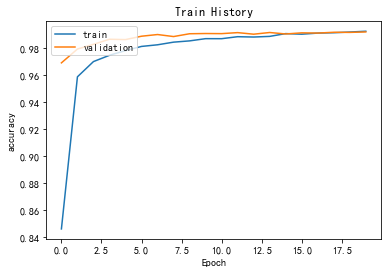

In [10]:
show_train_history(train_history,'accuracy','val_accuracy')

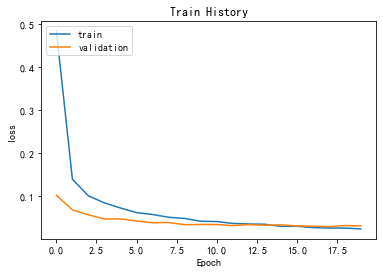

In [11]:
show_train_history(train_history,'loss','val_loss')

## 模型评估

In [ ]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]